File goes with Lecture 15

## Supervised Learning Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn import datasets, linear_model
#### Data Collection
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
#### Data Preparation
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

## See Supervised Learning Regression Results

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


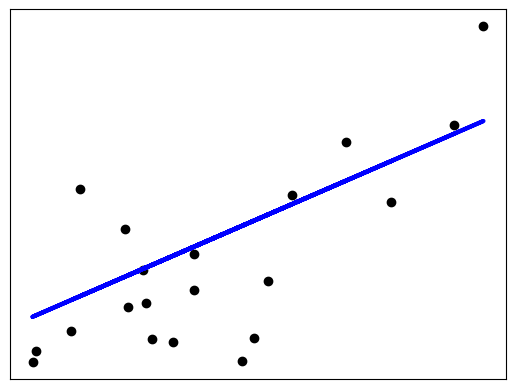

In [2]:
#### Training the Model
# Create linear regression object
regr = sk.linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
#### Model Evluation
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % sk.metrics.mean_squared_error(diabetes_y_test,
diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % sk.metrics.r2_score(diabetes_y_test,
diabetes_y_pred))
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# Unsupervised Learning Clustering

In [3]:
from sklearn.cluster import KMeans
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# See Unsupervised Learning Clustering Result

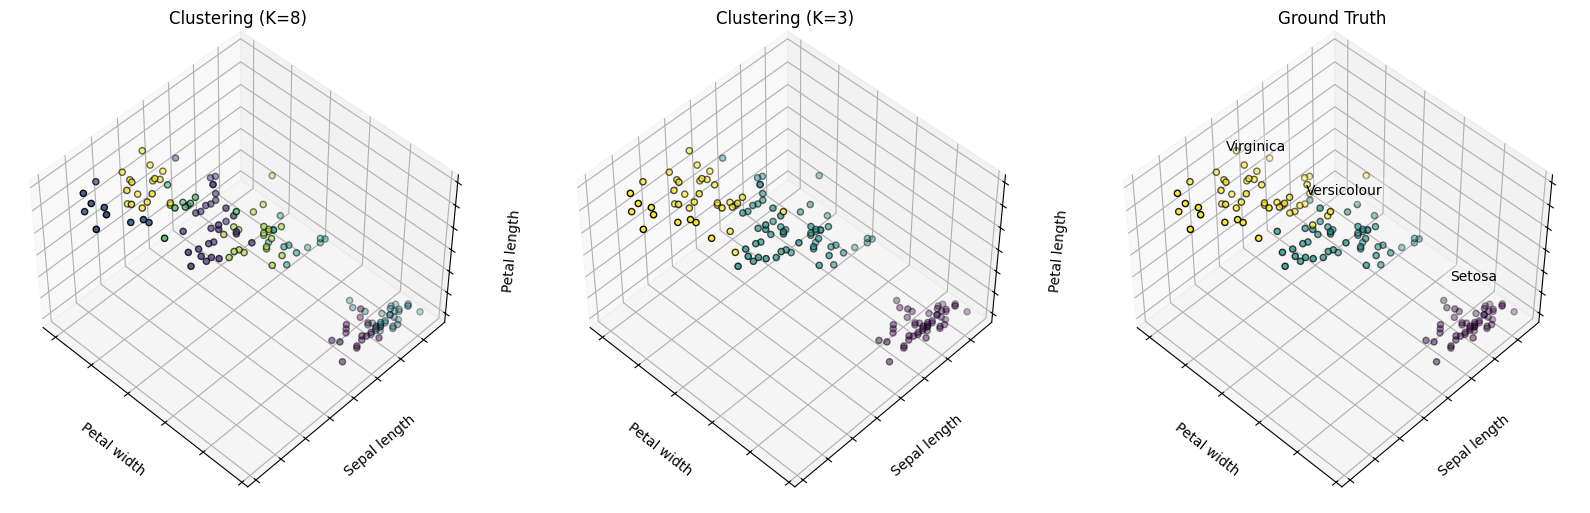

In [4]:
fig, axes = plt.subplots(1, 3, subplot_kw={"projection": "3d", "elev":48, "azim":134},figsize=(20, 16))
# Plot K measn with 8 clusters
est=KMeans(n_clusters=8)
est.fit(X)
labels = est.labels_
axes[0].scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")
axes[0].set_title("Clustering (K=8)")
# Plot K means with 3 Clusters
est=KMeans(n_clusters=3)
est.fit(X)
labels = est.labels_
axes[1].scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")
axes[1].set_title("Clustering (K=3)")
# Plot the Ground Truth
axes[2].scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")
axes[2].set_title("Ground Truth")
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    axes[2].text3D(
    X[y == label, 3].mean(),
    X[y == label, 0].mean(),
    X[y == label, 2].mean() + 2,
    name,
    horizontalalignment="center",
    bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
for ax in axes:
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
plt.show()

# Unsupervised Learning Dimentionality Reduction

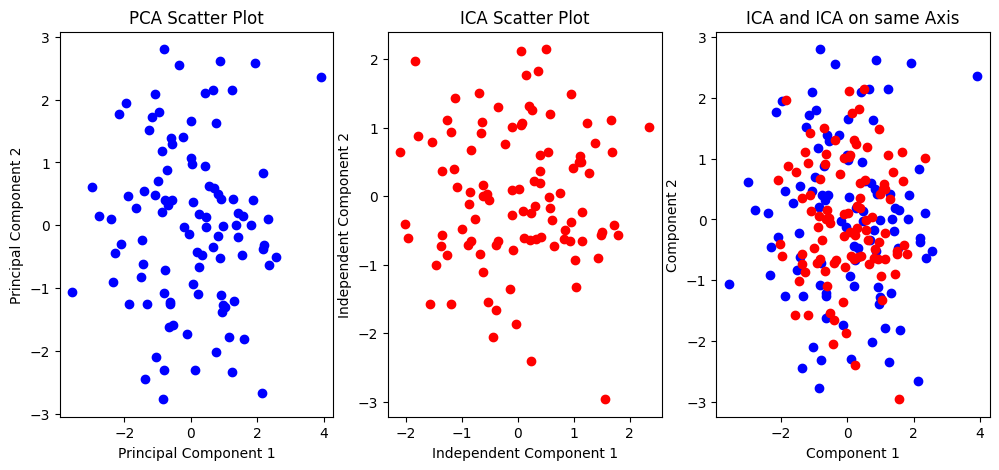

In [5]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
# Create a sample dataset
data = np.random.randn(100, 20)
# Initialize PCA model
pca = PCA(n_components=2)
# Fit PCA model to the data
pca.fit(data)
# Transform the data to the principal component space
principal_components = pca.transform(data)
# Initialize ICA model
ica = FastICA(n_components=2)
# Fit ICA model to the data
ica.fit(data)
# Transform the data to the independent component space
independent_components = ica.transform(data)
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
# Plot the principal components
axes[0].scatter(principal_components[:, 0], principal_components[:, 1], c='blue')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('PCA Scatter Plot')
axes[1].scatter(independent_components[:, 0], independent_components[:, 1], c='red')
axes[1].set_xlabel('Independent Component 1')
axes[1].set_ylabel('Independent Component 2')
axes[1].set_title('ICA Scatter Plot')
axes[2].scatter(principal_components[:, 0], principal_components[:, 1], c='blue')
axes[2].scatter(independent_components[:, 0], independent_components[:, 1], c='red')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')
axes[2].set_title('ICA and ICA on same Axis')
plt.show()